In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import shutil
import random

In [ ]:
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

In [ ]:
#pip install split-folders

In [ ]:
#import splitfolders

In [ ]:
#splitfolders.ratio('/content/drive/MyDrive/KaggleDataset', output="/content/drive/MyDrive/Kagglesplit", seed=1337, ratio=(.8, 0.1,0.1))

Copying files: 95 files [00:32,  3.98 files/s]

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
!pip install -q keras

In [ ]:
import keras

Reading images/dataset

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_data_generator = ImageDataGenerator(rescale = 1./255)
val_data_generator = ImageDataGenerator(rescale = 1./255)


Load images from the disk, apply rescaling, and resize them

In [ ]:
training_set = train_data_generator.flow_from_directory('/content/drive/MyDrive/Kagglesplit/train',
                                                 target_size = (255,255),
                                                 batch_size = 16,
                                                 class_mode = 'categorical'
                                                 )

validation_set = val_data_generator.flow_from_directory('/content/drive/MyDrive/Kagglesplit/val',
                                                 target_size = (255,255),
                                                 batch_size = 16,
                                                 class_mode = 'categorical'
                                                 )

Found 16505 images belonging to 15 classes.
Found 2059 images belonging to 15 classes.


In [ ]:
sample_training_images, _ = next(training_set) 

In [ ]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

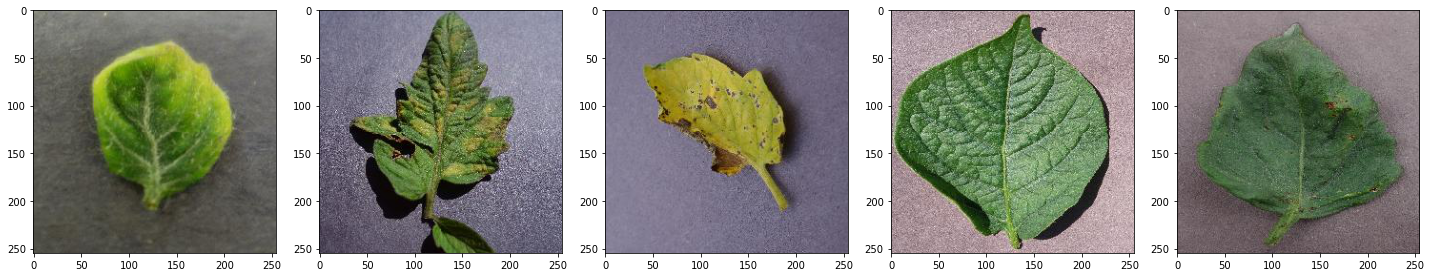

In [ ]:
plotImages(sample_training_images[:5])  # Plot images 0-4

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

In [ ]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [ ]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(255, 255, 3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(15, activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 252, 252, 32)      1568      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 126, 126, 32)      0         
_________________________________________________________________
flatten (Flatten)            (None, 508032)            0         
_________________________________________________________________
dense (Dense)                (None, 128)               65028224  
_________________________________________________________________
dense_1 (Dense)              (None, 15)                1935      
Total params: 65,031,727
Trainable params: 65,031,727
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [ ]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)
model.fit(training_set,epochs=3,validation_data=(validation_set),callbacks=[early_stop])

1032/1032 [==============================] - 1004s 972ms/step - loss: 0.0860 - accuracy: 0.9749 - val_loss: 1.1278 - val_accuracy: 0.7334


In [ ]:
#Creating a function to save the model
def save_model(model):
  modeldir = os.path.join("/content/drive/MyDrive/modelpdd")
  model_path = modeldir + ".h5" # save format of model
  print(f"Saving model to: {model_path}...")
  model.save(model_path)
  return model_path

In [ ]:
save_model(model)

Saving model to: /content/drive/MyDrive/modelpdd.h5...


'/content/drive/MyDrive/modelpdd.h5'

In [ ]:
model = tf.keras.models.load_model('/content/drive/MyDrive/modelpdd.h5')

In [ ]:
class_names = ['The plant Pepper Bell is diseased. Disease is bacterial spot',
               'The plant Pepper Bell is healthy',
               'The plant Potato is diseased. Disease is early blight',
               'The plant Potato is healthy.',
               'The plant Potato is diseased. Disease is late blight',
               'The plant Tomato is diseased. Disease is target spot',
               'The plant Tomato is diseased. Disease is tomato mosaic virus',
               'The plant Tomato is diseased. Disease is tomato yellow leaf curl virus',
               'The plant Tomato is diseased. Disease is bacterial spot',
               'The plant Tomato is diseased. Disease is tomato early blight',
               'The plant Tomato is healthy.',
               'The plant Tomato is diseased. Disease is tomato late blight',
               'The plant Tomato is diseased. Disease is leaf mold',
               'The plant Tomato is diseased. Disease is septoria leaf spot',
               'The plant Tomato is diseased. Disease is two spotted spider mite']

In [ ]:
import os
!pip install gradio
import gradio as gr

def predict(img):
  img_3d = img.reshape(1,255,255,3)
  im_resize = img_3d/255.0
  prediction = model.predict(im_resize)
  pred = np.argmax(prediction)
  return class_names[pred]

image = gr.inputs.Image(shape=(255, 255))
text = gr.outputs.Textbox(type="auto", label=None)

gr.Interface(predict, inputs=image, outputs=text).launch()

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
This share link will expire in 24 hours. If you need a permanent link, visit: https://gradio.app/introducing-hosted (NEW!)
Running on External URL: https://17461.gradio.app
Interface loading below...


(<Flask 'gradio.networking'>,
 'http://127.0.0.1:7862/',
 'https://17461.gradio.app')

In [ ]:
test_data_generator = ImageDataGenerator(rescale = 1./255)

In [ ]:
testing_set =  test_data_generator.flow_from_directory('/content/drive/MyDrive/Kagglesplit/test',
                                                 target_size = (255,255),
                                                 batch_size = 16,
                                                 class_mode = 'categorical'
                                                 )

Found 2075 images belonging to 15 classes.


In [ ]:
print(model.evaluate(testing_set,verbose=0))

[0.8212024569511414, 0.7445783019065857]


In [ ]:
model.predict_classes(testing_set)